<a href="https://colab.research.google.com/github/SulaksanaHS/Data_Mining/blob/main/CRISP_DM_Pengembangan_Manusia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
%matplotlib inline

In [6]:
# Muat Dataset
import pandas as pd
file_path = 'bps-od_15042_indeks_pmbngnn_manusia__prov_di_indonesia_data.csv'
df = pd.read_csv(file_path)

In [7]:
print("--- 2.1 Informasi Dataset Awal ---")
print(df.info())

--- 2.1 Informasi Dataset Awal ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          514 non-null    int64  
 1   kode_provinsi               514 non-null    int64  
 2   nama_provinsi               514 non-null    object 
 3   indeks_pembangunan_manusia  514 non-null    float64
 4   satuan                      514 non-null    object 
 5   tahun                       514 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 24.2+ KB
None


In [8]:
print("\n--- 2.2 Lima Baris Data Awal ---")
print(df.head())


--- 2.2 Lima Baris Data Awal ---
   id  kode_provinsi   nama_provinsi  indeks_pembangunan_manusia satuan  tahun
0   1             11            ACEH                       67.09   POIN   2010
1   2             12  SUMATERA UTARA                       67.09   POIN   2010
2   3             13  SUMATERA BARAT                       67.25   POIN   2010
3   4             14            RIAU                       68.65   POIN   2010
4   5             15           JAMBI                       65.39   POIN   2010


In [9]:
print("\n--- 2.3 Statistik Deskriptif IPM ---")
print(df['indeks_pembangunan_manusia'].describe())


--- 2.3 Statistik Deskriptif IPM ---
count    514.000000
mean      69.127101
std        7.069435
min        0.000000
25%       66.680000
50%       69.635000
75%       72.222500
max       83.080000
Name: indeks_pembangunan_manusia, dtype: float64


In [10]:
# Cek Missing Values
print("\n--- 2.4 Cek Missing Values ---")
print(df.isnull().sum())
# Hasil: Data bersih, tidak ada missing value.


--- 2.4 Cek Missing Values ---
id                            0
kode_provinsi                 0
nama_provinsi                 0
indeks_pembangunan_manusia    0
satuan                        0
tahun                         0
dtype: int64


In [11]:
# a. Pemilihan Fitur (Feature Selection)
# Hapus kolom yang tidak relevan ('id', 'kode_provinsi', 'satuan')
df_clean = df.drop(columns=['id', 'kode_provinsi', 'satuan'])
print("Kolom yang digunakan: ", df_clean.columns.tolist())

Kolom yang digunakan:  ['nama_provinsi', 'indeks_pembangunan_manusia', 'tahun']


In [12]:
# b. Filter Data untuk DKI Jakarta (Studi Kasus)
PROVINSI_TARGET = 'DKI JAKARTA'
df_jakarta = df_clean[df_clean['nama_provinsi'] == PROVINSI_TARGET].copy()
df_jakarta = df_jakarta.drop(columns=['nama_provinsi'])
df_jakarta = df_jakarta.sort_values(by='tahun').reset_index(drop=True)

In [13]:
print(f"\n--- 3.1 Data {PROVINSI_TARGET} ({df_jakarta['tahun'].min()}-{df_jakarta['tahun'].max()}) ---")
print(df_jakarta)


--- 3.1 Data DKI JAKARTA (2010-2024) ---
    indeks_pembangunan_manusia  tahun
0                        76.31   2010
1                        76.98   2011
2                        77.53   2012
3                        78.08   2013
4                        78.39   2014
5                        78.99   2015
6                        79.60   2016
7                        80.06   2017
8                        80.47   2018
9                        80.76   2019
10                       80.77   2020
11                       81.11   2021
12                       81.65   2022
13                       82.46   2023
14                       83.08   2024


In [14]:
# c. Pemisahan Fitur (X) dan Target (Y)
X = df_jakarta[['tahun']].values # Fitur: Tahun
y = df_jakarta['indeks_pembangunan_manusia'].values # Target: Nilai IPM

In [15]:
# d. Data Splitting (Time Series Split)
# Membagi 80% data untuk Training (2010-2021) dan 20% untuk Testing (2022-2024)
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, shuffle=False
)

In [16]:
print(f"\n--- 3.2 Pembagian Data ---")
print(f"Data Training: {len(X_train)} baris (Tahun {X_train.min()} s/d {X_train.max()})")
print(f"Data Testing: {len(X_test)} baris (Tahun {X_test.min()} s/d {X_test.max()})")


--- 3.2 Pembagian Data ---
Data Training: 12 baris (Tahun 2010 s/d 2021)
Data Testing: 3 baris (Tahun 2022 s/d 2024)


In [17]:
# a. Modeling
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# b. Prediksi pada Data Testing
y_pred = model.predict(X_test)

In [19]:
# a. Hitung Metrik Regresi
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print("--- 5.1 Metrik Kinerja Model ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

--- 5.1 Metrik Kinerja Model ---
Mean Squared Error (MSE): 2.2793
Root Mean Squared Error (RMSE): 1.5097
Mean Absolute Error (MAE): 1.3916
R-squared (R2 Score): -5.6486


In [21]:
# b. Perbandingan Hasil Prediksi vs Aktual
hasil = pd.DataFrame({
    'Tahun': X_test.flatten(),
    'IPM Aktual': y_test,
    'IPM Prediksi': y_pred.round(2)
})

In [22]:
# c. Visualisasi Hasil
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

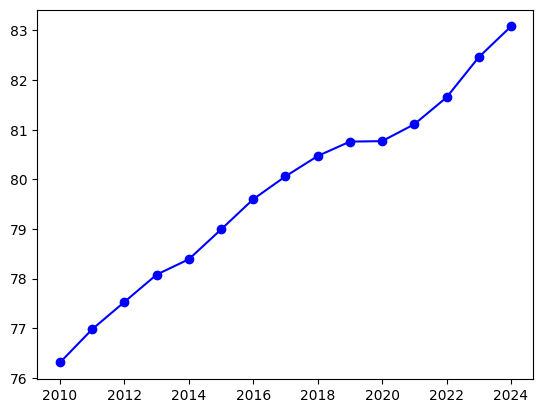

In [23]:
# Plot data aktual (historis)
plt.plot(df_jakarta['tahun'], df_jakarta['indeks_pembangunan_manusia'],
         label='IPM Historis (Aktual)', marker='o', color='blue')

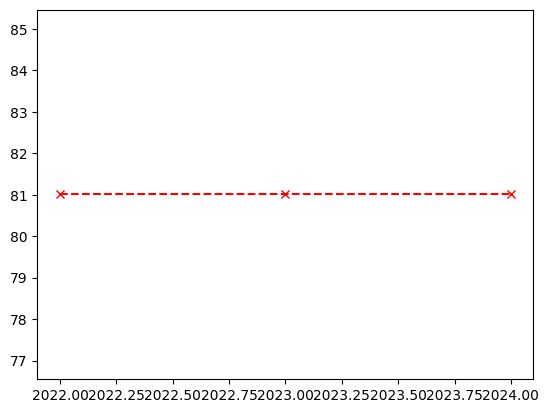

In [24]:
# Plot prediksi pada data testing
plt.plot(X_test.flatten(), y_pred,
         label='IPM Prediksi (Testing)', marker='x', linestyle='--', color='red')

/tmp/ipython-input-670087888.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


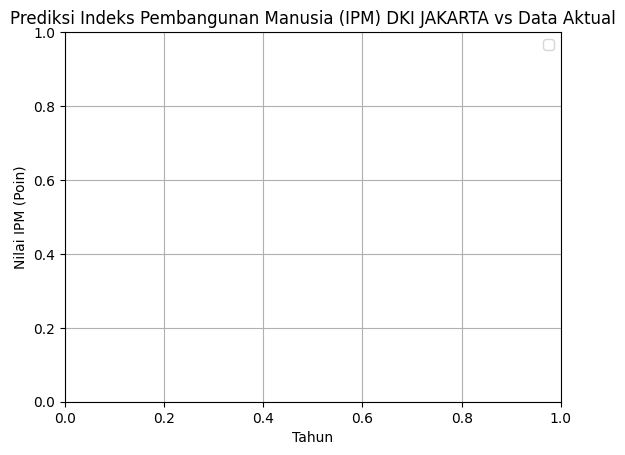

In [25]:
plt.title(f'Prediksi Indeks Pembangunan Manusia (IPM) {PROVINSI_TARGET} vs Data Aktual')
plt.xlabel('Tahun')
plt.ylabel('Nilai IPM (Poin)')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# Memprediksi IPM untuk tahun 2025
tahun_prediksi = np.array([[2025]])
ipm_prediksi_2025 = model.predict(tahun_prediksi)[0]

In [27]:
print(f"Prediksi IPM {PROVINSI_TARGET} pada Tahun 2025 adalah: {ipm_prediksi_2025:.2f} Poin")

Prediksi IPM DKI JAKARTA pada Tahun 2025 adalah: 81.01 Poin
